#### Complete Case Analysis CCA
- also called list-wise deletion of cases/ rows where value of any variable/column is missing
- complete case analysis means only analysing those cases where data is complete

##### Adv
- Easy to implement/ no data manipulation required
- Preserves variables distribution if data is MCAR (missing completely at random)

##### Dist
- it can exclude a large fraction of origninal data
- excluded observations could be informative if data is not mcar
- in production model can't handle null data, we must use techniques to handle missing data instead of removing it

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isna().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [13]:
#we will be removing null values only if they are less than 5%
cols = [col for col in df.columns if df[col].isna().mean()<0.05 and df[col].isna().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
df = df[cols]

In [15]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [16]:
new_df = df[cols].dropna()

In [17]:
new_df.shape, df.shape

((17182, 5), (19158, 5))

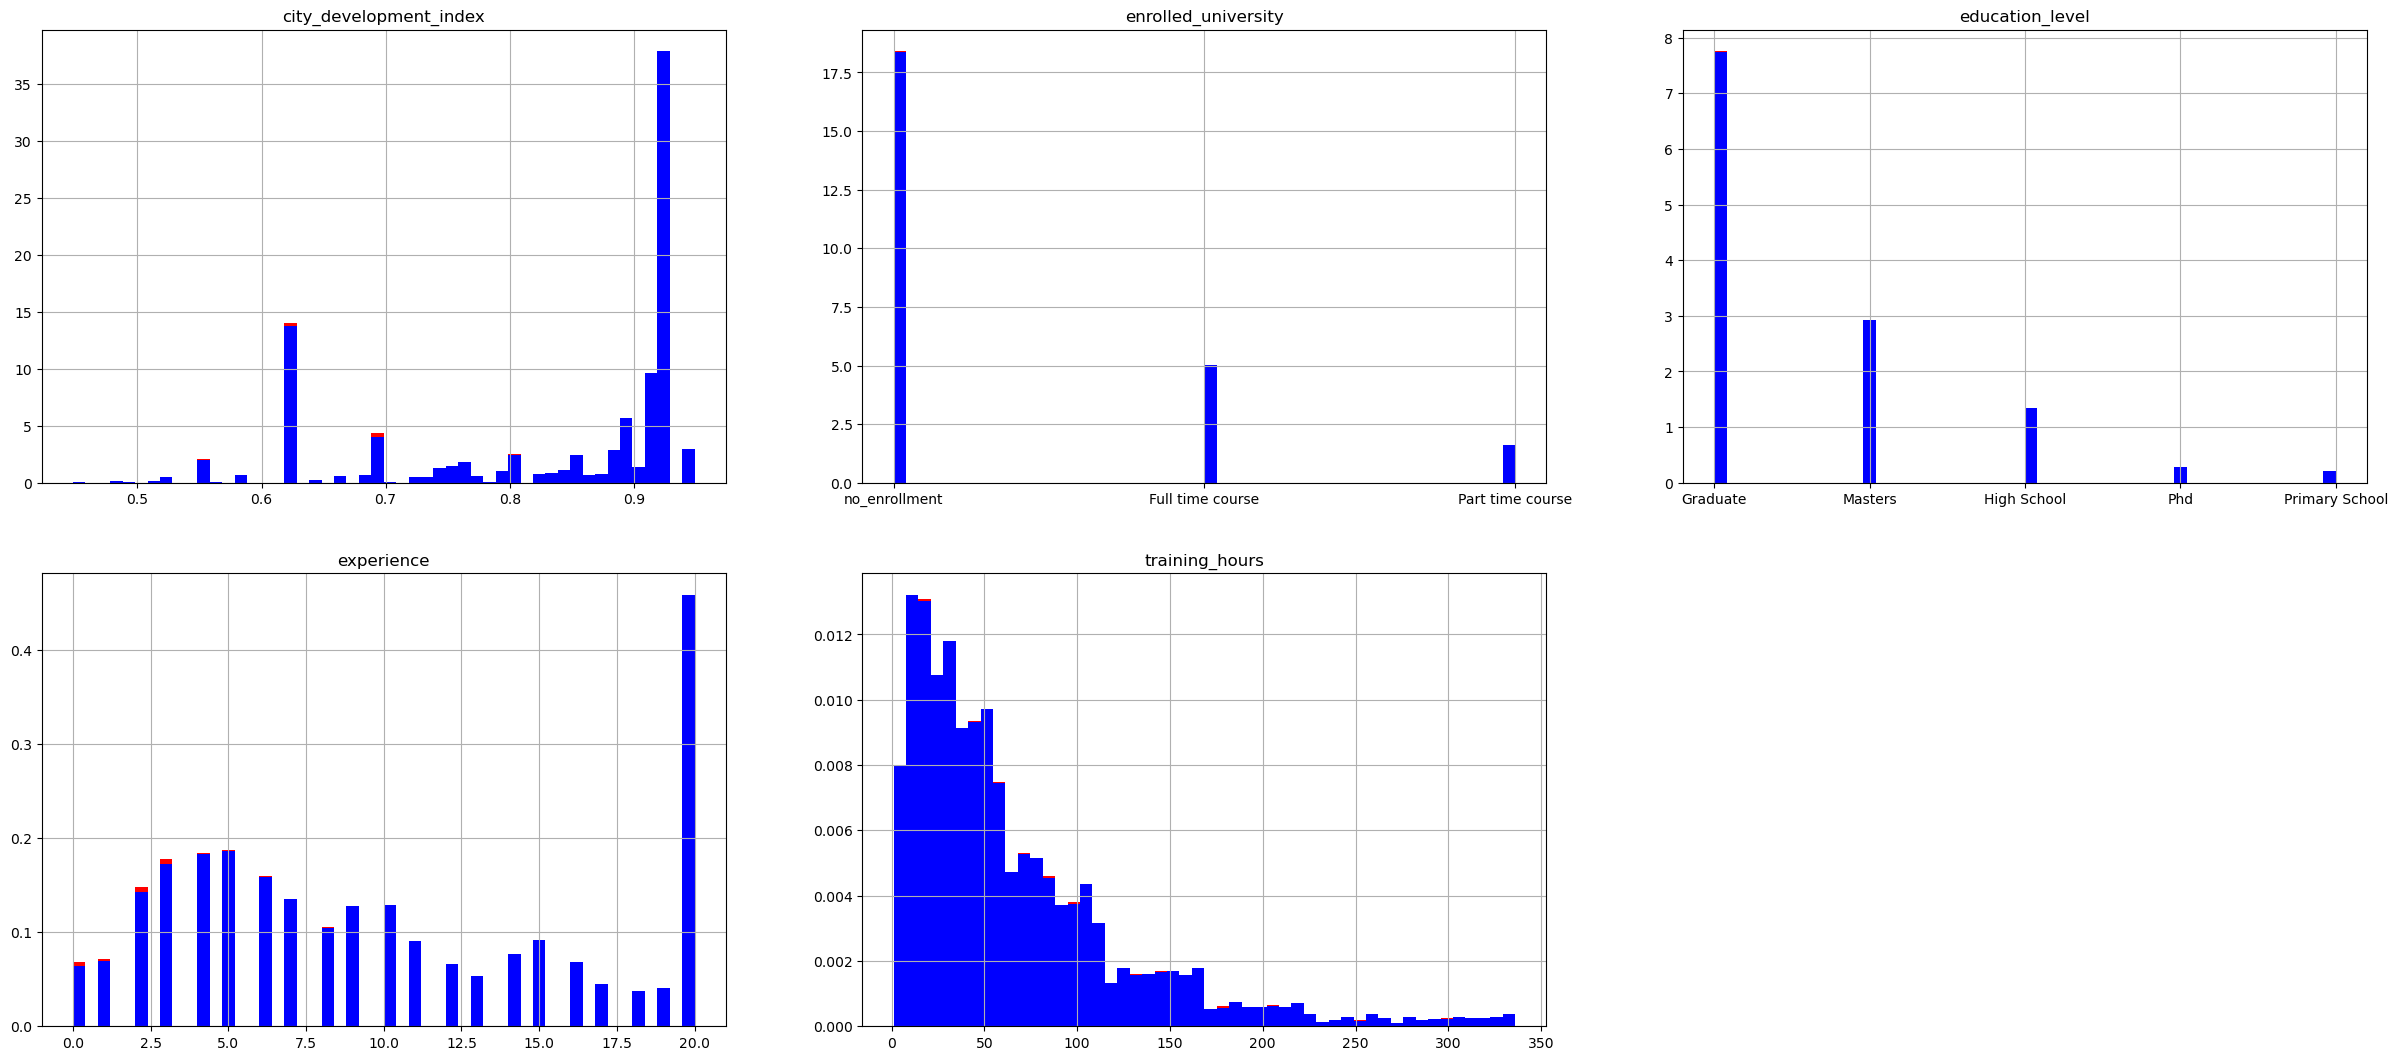

In [25]:
## Now comparing the filtered data ith old one
## is there any significant difference or not
plt.figure(figsize=(30, 20))
i = 1
for col in cols:
    plt.subplot(3,3,i)
    df[col].hist(bins=50, density=True, color='red')
    new_df[col].hist(bins=50, density=True, color='blue')
    plt.title(col)
    i+=1

plt.show()

In [33]:
df['enrolled_university']

0           no_enrollment
1           no_enrollment
2        Full time course
3                     NaN
4           no_enrollment
               ...       
19153       no_enrollment
19154       no_enrollment
19155       no_enrollment
19156       no_enrollment
19157       no_enrollment
Name: enrolled_university, Length: 19158, dtype: object

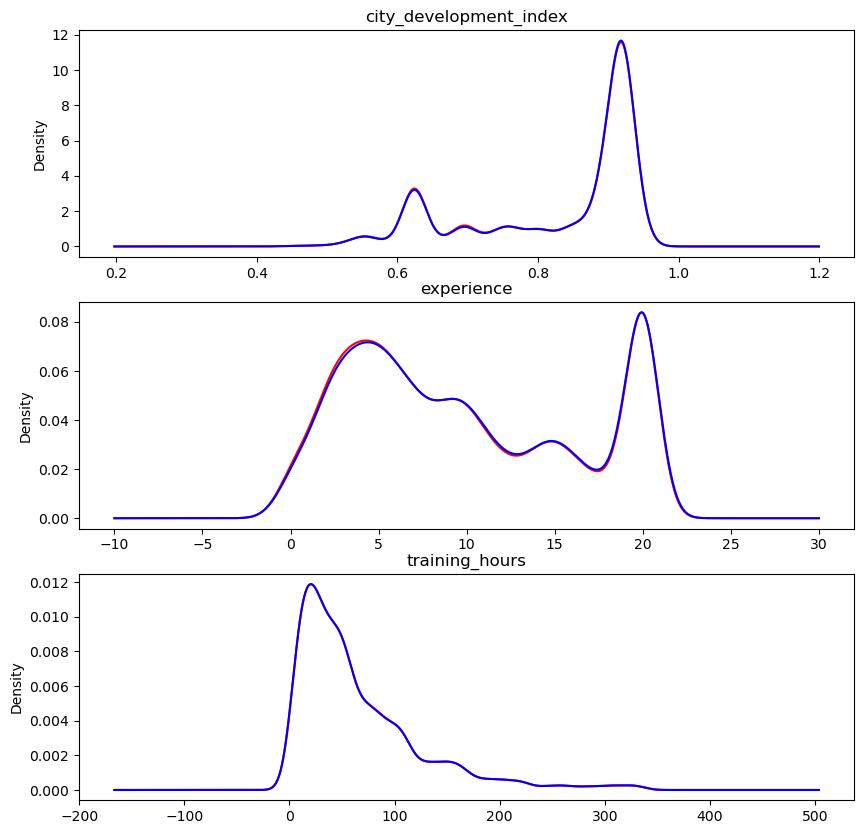

In [43]:
plt.figure(figsize=(10, 10))
i = 1
for col in cols:
    if(col!='enrolled_university' and col!='education_level'):
        plt.subplot(3,1,i)
        df[col].plot.density(color='red')
        new_df[col].plot.density(color='blue')
        plt.title(col)
        i+=1
    #only ploting kde of numric cols
plt.show()

No significant change in distribution

In [54]:
temp = pd.DataFrame({
    'x': df['education_level'].value_counts()/len(df),
    'y':new_df['education_level'].value_counts()/len(new_df)
})

In [55]:
temp.columns = ['raw', 'filtered']

In [56]:
temp

,raw,filtered
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
